In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [12]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [13]:
df.iloc[2]["tweet_text"]

'@XochitlSuckkks a classy whore? Or more red velvet cupcakes?'

In [14]:
df["cyberbullying_type"].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [43]:
import pandas as pd

# Assuming df is your original DataFrame
df = pd.read_csv("cyberbullying_tweets.csv")  # Load your data if not already loaded

# Group by 'cyberbullying_type' and sample 4000 from each group
sampled_df = (
    df.groupby("cyberbullying_type")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

# Display the new dataset
print(sampled_df.head())

# Save the new dataset to a CSV file if needed
sampled_df.to_csv("sampled_dataset.csv", index=False)

                                          tweet_text cyberbullying_type
0  Every single one is a girl that would have bul...                age
1  that post ab kpop stans going to school togeth...                age
2  Because some people have nothing better to do,...                age
3  Bro I coach JV this past year at Skyline....Br...                age
4  These ladies really do remind me of the high s...                age


In [46]:
sampled_df["cyberbullying_type"].value_counts()

cyberbullying_type
age                    4000
ethnicity              4000
gender                 4000
not_cyberbullying      4000
other_cyberbullying    4000
religion               4000
Name: count, dtype: int64

In [15]:
to_replace = ["religion", "age", "gender", "ethnicity", "other_cyberbullying"]

In [16]:
new_df = df.copy()
for i in to_replace:
    new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(i, 1)

In [17]:
new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(
    "not_cyberbullying", 0
)

In [47]:
new_df = sampled_df.copy()

In [48]:
new_df.head(5)

,tweet_text,cyberbullying_type
0,Every single one is a girl that would have bul...,age
1,that post ab kpop stans going to school togeth...,age
2,"Because some people have nothing better to do,...",age
3,Bro I coach JV this past year at Skyline....Br...,age
4,These ladies really do remind me of the high s...,age


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'age'),
  Text(1, 0, 'ethnicity'),
  Text(2, 0, 'gender'),
  Text(3, 0, 'not_cyberbullying'),
  Text(4, 0, 'other_cyberbullying'),
  Text(5, 0, 'religion')])

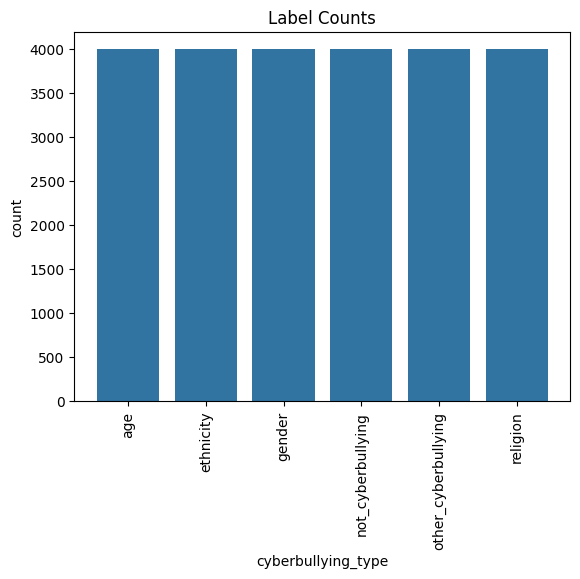

In [49]:
plt.title("Label Counts")
sns.countplot(data=new_df, x="cyberbullying_type")
plt.plot()
plt.xticks(rotation=90)

In [50]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [51]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [52]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
all_text = " ".join(new_df["tweet_text"].values)
all_text = re.sub(r"http\S+", "", all_text)
all_text = re.sub(r"@\S+", "", all_text)
all_text = re.sub(r"#\S+", "", all_text)
words = all_text.split()

In [54]:
stop_words = set(stopwords.words("english"))
words = [word for word in words if not word in stop_words]

In [55]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 7999),
 ('school', 3357),
 ('like', 2587),
 ('high', 2325),
 ('dumb', 2154),
 ('RT', 2132),
 ('bullied', 2127),
 ('people', 1905),
 ('u', 1677),
 ('fuck', 1529),
 ('rape', 1519),
 ('one', 1426),
 ('bully', 1373),
 ('gay', 1368),
 ('&amp;', 1280),
 ('The', 1264),
 ('get', 1264),
 ('nigger', 1243),
 ('You', 1239),
 ('ass', 1204),
 ('girls', 1177),
 ("I'm", 1154),
 ('girl', 1133),
 ('jokes', 1060),
 ('would', 1030),
 ('know', 1011),
 ('think', 948),
 ('black', 925),
 ('white', 839),
 ('got', 798),
 ('call', 774),
 ('say', 770),
 ('FUCK', 754),
 ('make', 747),
 ('called', 720),
 ('Muslim', 715),
 ('And', 707),
 ('Muslims', 706),
 ('see', 685),
 ('even', 681),
 ('never', 677),
 ('still', 677),
 ('ur', 657),
 ('-', 651),
 ('This', 644),
 ('A', 628),
 ('go', 627),
 ('fucking', 624),
 ('right', 605),
 ('really', 596),
 ('want', 594),
 ('joke', 593),
 ('If', 591),
 ('women', 574),
 ('bitch', 572),
 ('Christian', 572),
 ('hate', 564),
 ('said', 563),
 ('.', 539),
 ('support', 537),
 ('bul

In [56]:
slang_dict = {
    "u": "you",
    "r": "are",
    "ur": "your",
    "4": "for",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "idk": "I don't know",
    "im": "I am",
    "w/": "with",
    "w/o": "without",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "btw": "by the way",
    "bff": "best friend forever",
    "ttyl": "talk to you later",
    "brb": "be right back",
    "bc": "because",
    "cya": "see you",
    "luv": "love",
    "y": "why",
    "tho": "though",
    "til": "until",
    "ikr": "I know, right",
    "tbh": "to be honest",
    "np": "no problem",
    "jk": "just kidding",
    "smh": "shaking my head",
    "omw": "on my way",
    "thru": "through",
    "fav": "favorite",
    "msg": "message",
    "dm": "direct message",
    "bday": "birthday",
    "xoxo": "hugs and kisses",
}

In [57]:
new_df["tweet_text"] = new_df["tweet_text"].str.lower()

In [58]:
new_df["tweet_text"] = new_df["tweet_text"].apply(
    lambda text: " ".join([slang_dict.get(word, word) for word in text.split()])
)

In [59]:
new_df

,tweet_text,cyberbullying_type
0,every single one is a girl that would have bul...,age
1,that post ab kpop stans going to school togeth...,age
2,"because some people have nothing better to do,...",age
3,bro i coach jv this past year at skyline....br...,age
4,these ladies really do remind me of the high s...,age
...,...,...
23995,illegal? you are the one who put the muslim ba...,religion
23996,especially considering his abandonment of the ...,religion
23997,this is what happens when you are a city fun b...,religion
23998,"it's not a ""muslim"" ban you idiot!",religion


In [60]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [61]:
from nltk.stem import PorterStemmer

In [62]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub("<.*?>", "", text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^a-zA-Z]", " ", text).lower()

    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the words back into a string
    text = " ".join(words)
    return text

In [63]:
new_df["cleaned_text"] = new_df["tweet_text"].apply(clean_text)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
cv = CountVectorizer()
X = cv.fit_transform(new_df["cleaned_text"]).toarray()
y = new_df["cyberbullying_type"]

In [66]:
len(X)

24000

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a Logistic Regression Model
clf = LogisticRegression(max_iter=1000)

In [73]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss='log_loss')


batch_size = 1000
for i in range(0, X_train.shape[0], batch_size):
    end = i + batch_size if i + batch_size < X_train.shape[0] else X_train.shape[0]
    clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(y_train))

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8077083333333334


In [71]:
# clf.fit(X_train, y_train)

MemoryError: Unable to allocate 4.41 GiB for an array with shape (19200, 30815) and data type float64

In [77]:
y_pred = clf.predict(X_test)

In [78]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8077083333333334


In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=500)

# Define the hyperparameters to tune
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None], 
    "C": [0.01, 0.1, 1, 10, 100], 
    "solver": ["liblinear", "saga"],  
}


grid_search = GridSearchCV(
    estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy"
)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)